In [1]:
#K-Means experiment
#Use Cellphone Metadata to determine user home and work locations
##  Source: Lab 5.2 from Edx DAT210X  ##

#Setup

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

matplotlib.style.use('ggplot') # Look Pretty

def showandtell(title=None):
    if title != None: plt.savefig(title + ".png", bbox_inches='tight', dpi=300)
    plt.show()
    # exit()

In [2]:
#Upload file

df = pd.read_csv("KMeans Data.csv")

In [3]:
# Convert the date and the time

df.CallDate = pd.to_datetime(df.CallDate)
df.CallTime = pd.to_timedelta(df.CallTime)

In [4]:
# filter the home dataframes to weekend mornings and evenings

home_df = df[df["DOW"].isin(["Sat", "Sun"])&((df["CallTime"] < "06:00:00") | (df["CallTime"] < "06:00:00"))]

    
    
# filter the work dataframes to weekdays before 5

work_df = df[df["DOW"].isin(["Mon", "Tue", "Wed", "Thu", "Fri"])&(df["CallTime"] < "17:00:00")]

In [5]:
# Create dataframes with only location data
home_loc = home_df[["TowerLon", "TowerLat"]]
    
work_loc = work_df[["TowerLon", "TowerLat"]]

[[-96.604444    32.703056  ]
 [-96.835175    32.84636523]
 [-96.777278    32.772361  ]
 [-96.92355027  32.87096627]
 [-96.73200835  32.87749018]
 [-96.70946227  32.73167155]
 [-96.81261355  32.77368048]
 [-96.85124629  32.70457129]
 [-96.68708367  32.7674535 ]
 [-96.86428887  32.8655004 ]]


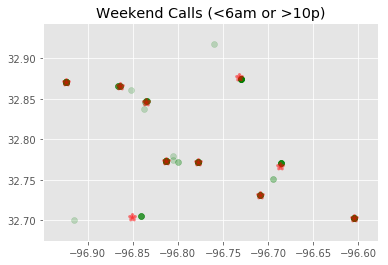

In [6]:
#Plot weekend morning and evening points, centroid

df = home_loc

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)
kmeans.fit(df)
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_


fig = plt.figure()
ax = fig.add_subplot(111)
#plot calls
ax.scatter(df.TowerLon,df.TowerLat, c='g', marker='o', alpha=0.2)
#plot centroids
ax.scatter(centroids[:,0], centroids[:,1], marker='*', c='r', alpha=0.5, linewidths=3)
ax.set_title('Weekend Calls (<6am or >10p)')

print(centroids)
showandtell()

[[-96.854348    32.84224275]
 [-96.93516129  32.69553352]
 [-96.80083627  32.77325491]
 [-96.76040552  32.91425958]
 [-96.89344696  32.73297911]
 [-96.604444    32.703056  ]
 [-96.80253798  32.9835683 ]
 [-96.7329684   32.74273498]
 [-96.91641534  32.88576477]
 [-96.83502708  32.7226328 ]]


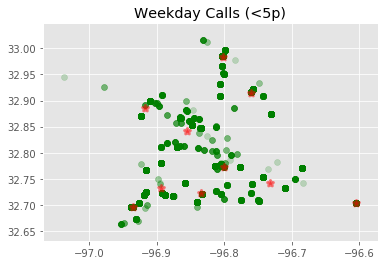

In [7]:
#Plot weekday points before 5, and centroids

df = work_loc

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 10)
kmeans.fit(df)
labels = kmeans.predict(df)
centroids = kmeans.cluster_centers_


fig = plt.figure()
ax = fig.add_subplot(111)
#plot calls
ax.scatter(df.TowerLon,df.TowerLat, c='g', marker='o', alpha=0.2)
#plot centroids
ax.scatter(centroids[:,0], centroids[:,1], marker='*', c='r', alpha=0.5, linewidths=3)
ax.set_title('Weekday Calls (<5p)')

print(centroids)
showandtell()